# Column Description:
- Country: The name of the country where the data was collected.

- Year: The year when the data was recorded.

- Status: The development status of the country, either "Developed" or "Developing."

- Life expectancy: The average number of years a newborn is expected to live if current mortality rates continue.

- Adult Mortality: The probability of dying between 15 to 60 years per 1000 adults.

- infant deaths: The number of infants dying before reaching one year of age, per 1000 live births.

- Alcohol: Per capita (15+) alcohol consumption in litres of pure alcohol.

- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product (GDP).

- Hepatitis B: Immunization coverage among 1-year-olds (%).

- Measles: The number of reported cases of measles per 1000 population.

- BMI: Average Body Mass Index of the entire population.

- under-five deaths: The number of children dying before reaching five years of age, per 1000 live births.

- Polio: Immunization coverage for Polio among 1-year-olds (%).

- Total expenditure: General government expenditure on health as a percentage of total government expenditure.

- Diphtheria: Immunization coverage for Diphtheria among 1-year-olds (%).

- HIV/AIDS: Deaths per 1,000 live births due to HIV/AIDS (0-4 years).

- GDP: Gross Domestic Product per capita in USD.

- Population: The population of the country.

- thinness 1-19 years: Prevalence of thinness among children and adolescents aged 1-19 years (%).

- thinness 5-9 years: Prevalence of thinness among children aged 5-9 years (%).

- Income composition of resources: Human development index (composite of life expectancy, education, and income indices) based on per capita income.

- Schooling: Average number of years of schooling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## check missing values

In [6]:
(df.isna().sum() / len(df)) * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
df.columns=df.columns.str.strip()

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
copy_df=df.copy()

In [10]:
#we will remove null values from our target column Life expectancy
copy_df.dropna(subset=['Life expectancy'],inplace=True)

In [11]:
copy_df['Life expectancy'].isna().sum()

0

## check duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2928.0,2.007500e+03,4.610560e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2928.0,3.040745e+01,1.181144e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2735.0,4.614856e+00,4.050749e+00,0.01000,0.905000,3.770000e+00,7.715000e+00,1.787000e+01
percentage expenditure,2928.0,7.403212e+02,1.990931e+03,0.00000,4.853964,6.561145e+01,4.426143e+02,1.947991e+04
Hepatitis B,2375.0,8.096084e+01,2.501834e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2928.0,2.427856e+03,1.148597e+04,0.00000,0.000000,1.700000e+01,3.622500e+02,2.121830e+05
BMI,2896.0,3.823539e+01,1.995959e+01,1.00000,19.300000,4.335000e+01,5.610000e+01,7.760000e+01
under-five deaths,2928.0,4.217930e+01,1.607005e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [14]:
num_cols=copy_df.select_dtypes(include=['number']).columns.to_list()
#num_cols

In [15]:
cat_cols=copy_df.select_dtypes(include=['object']).columns.to_list()
cat_cols

['Country', 'Status']

In [16]:
copy_df.describe(include='O').T

,count,unique,top,freq
Country,2928,183,Afghanistan,16
Status,2928,2,Developing,2416


# EDA
**The data-set aims to answer the following key questions:**

- Does various predicting factors which has been chosen initially really affect  the Life expectancy? What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
- How does Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- Do densely populated countries tend to have lower life expectancy?
- What is the impact of Immunization coverage on life Expectancy?

In [17]:
sns.set_style('darkgrid')
sns.set_palette("coolwarm")

In [ ]:
#sns.palplot(sns.color_palette("coolwarm"))

In [18]:
def plot_histogram_and_boxplot(data, column):
   
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram plot
    sns.histplot(data[column], kde=True, ax=ax[0], color='skyblue')
    ax[0].set_title(f'Histogram of {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=data[column], ax=ax[1], color='lightgreen')
    ax[1].set_title(f'Boxplot of {column}')
    ax[1].set_xlabel(column)
    
    # Display the plots
    plt.tight_layout()
    plt.show()


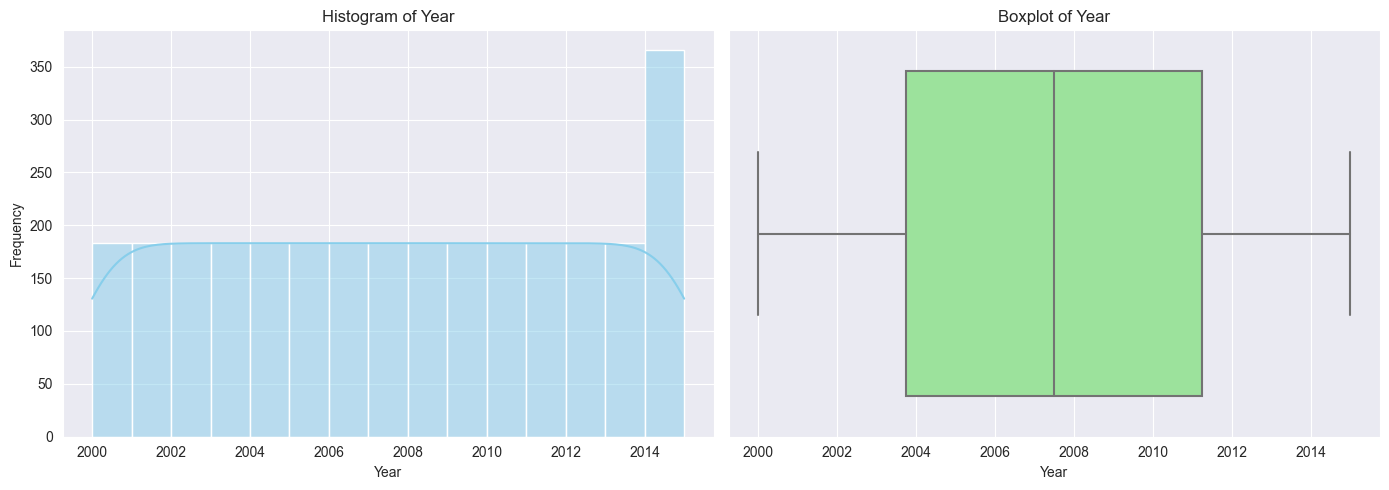

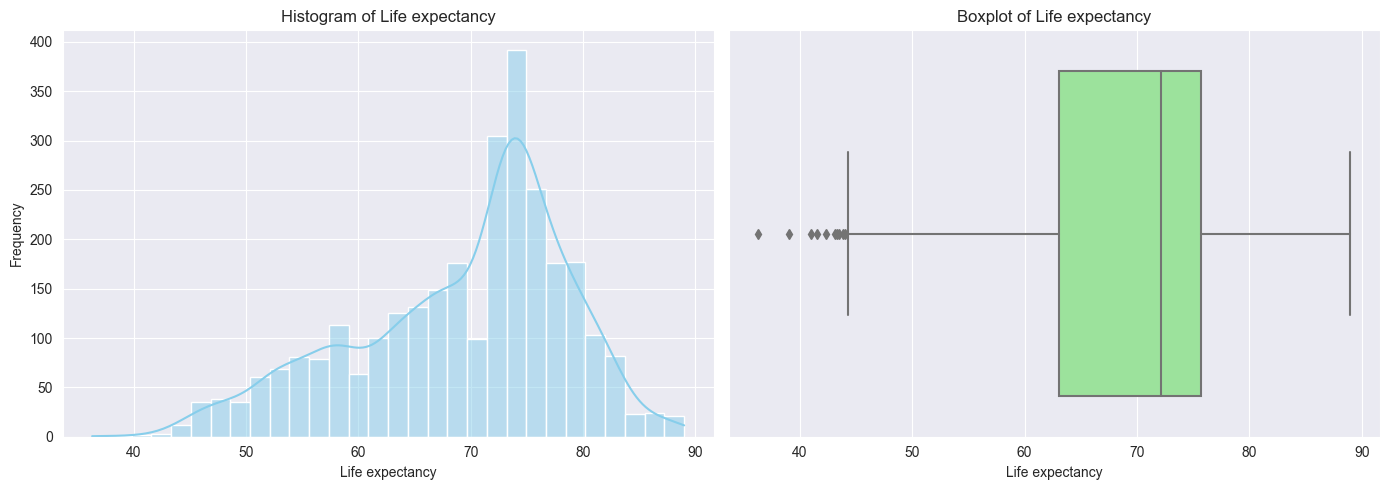

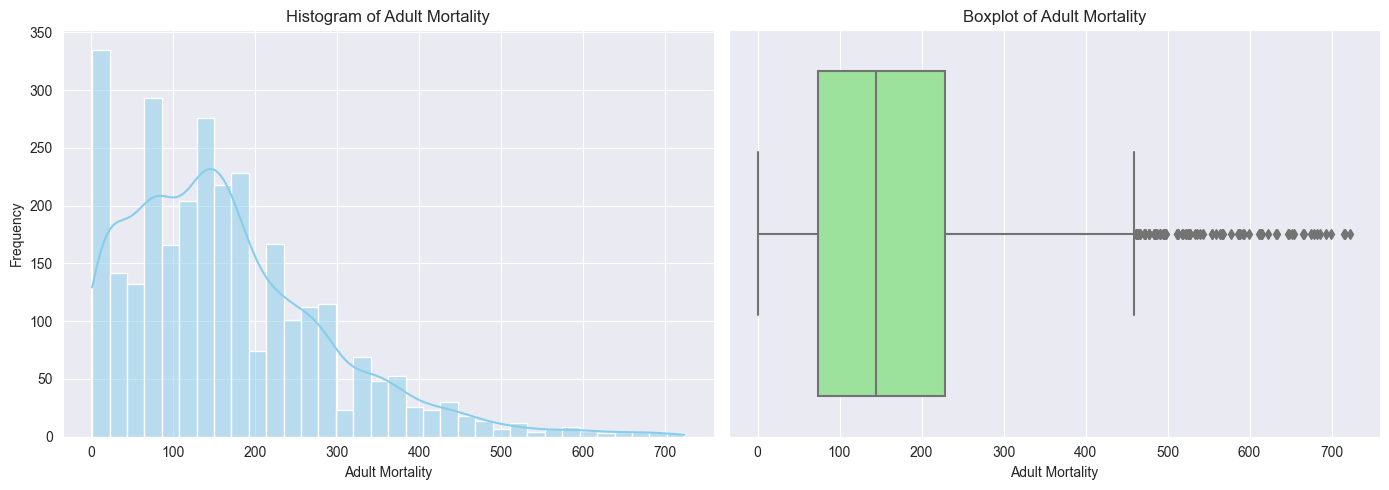

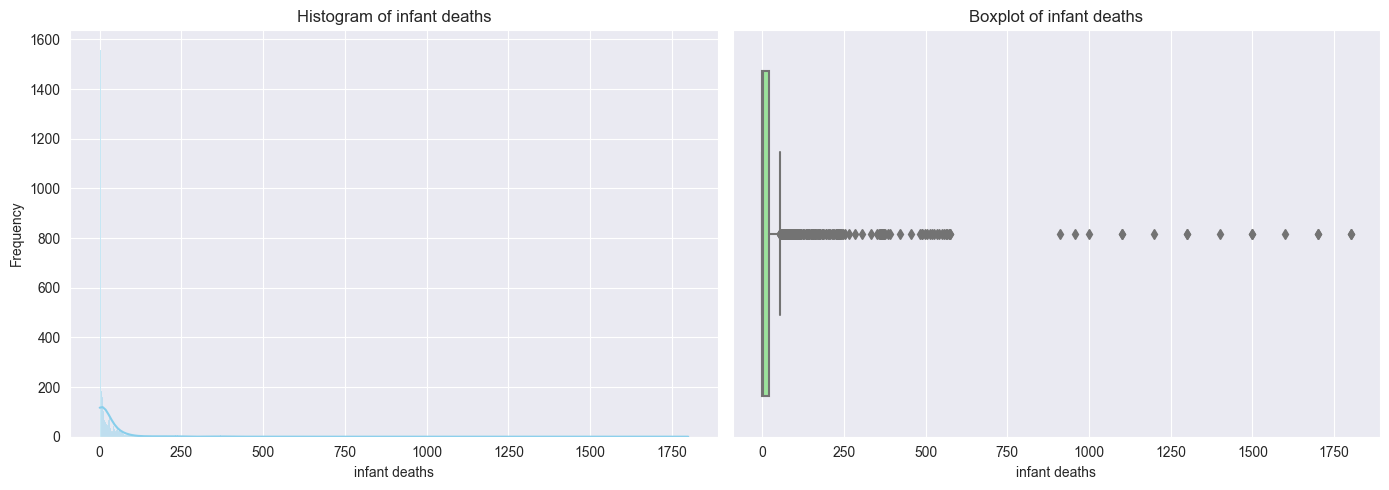

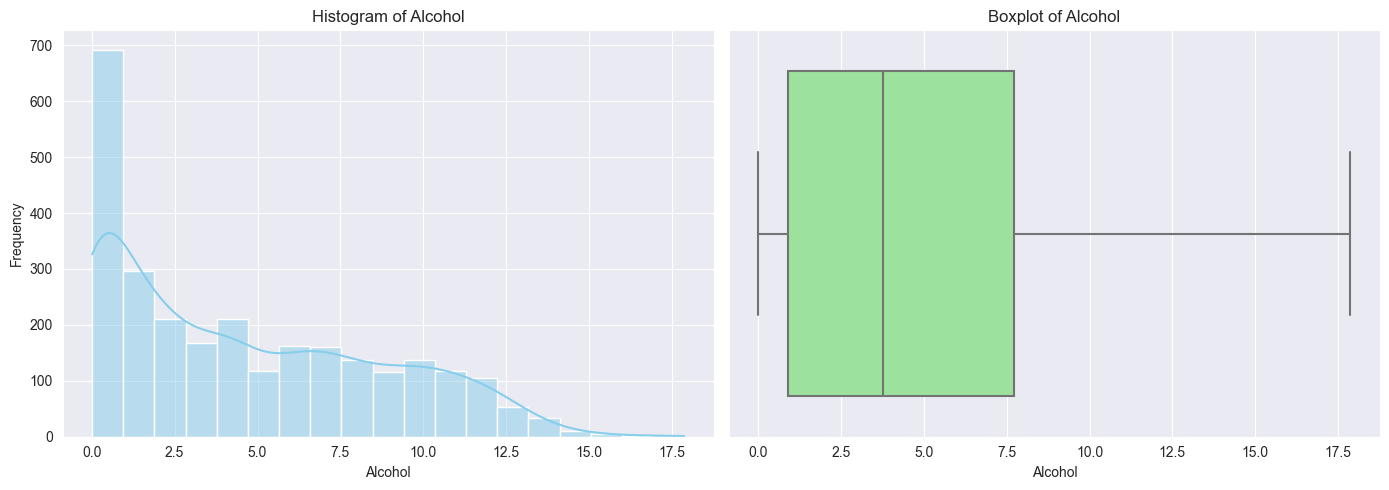

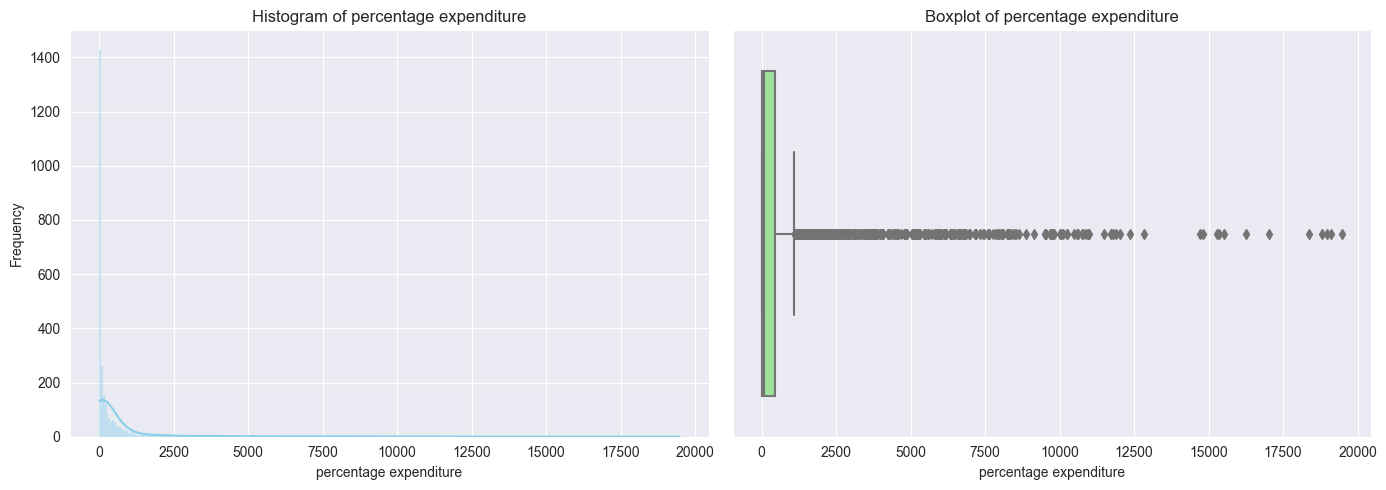

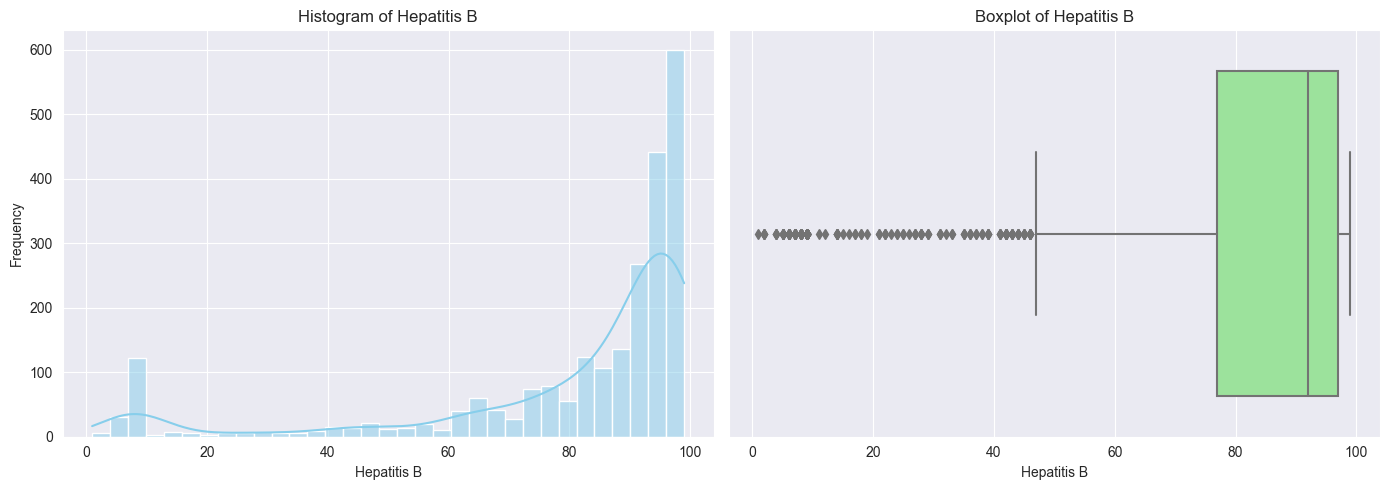

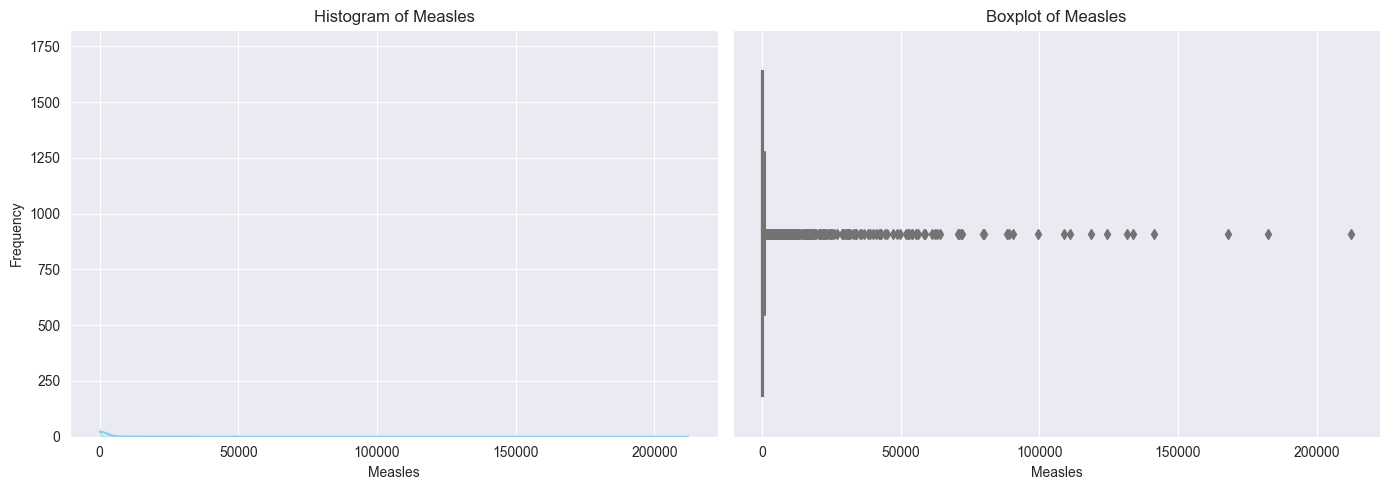

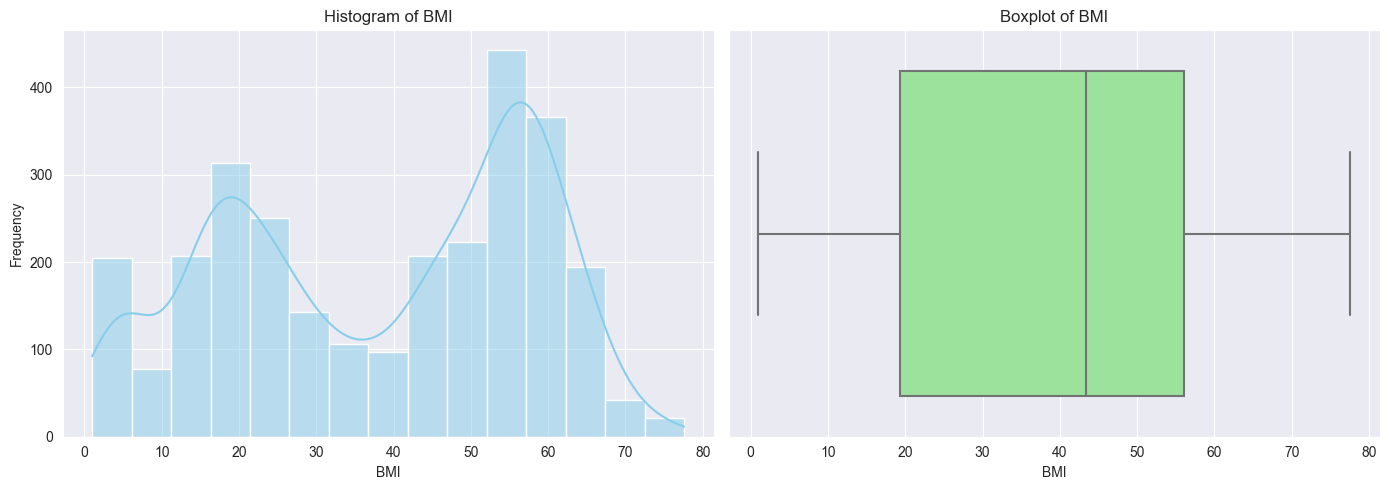

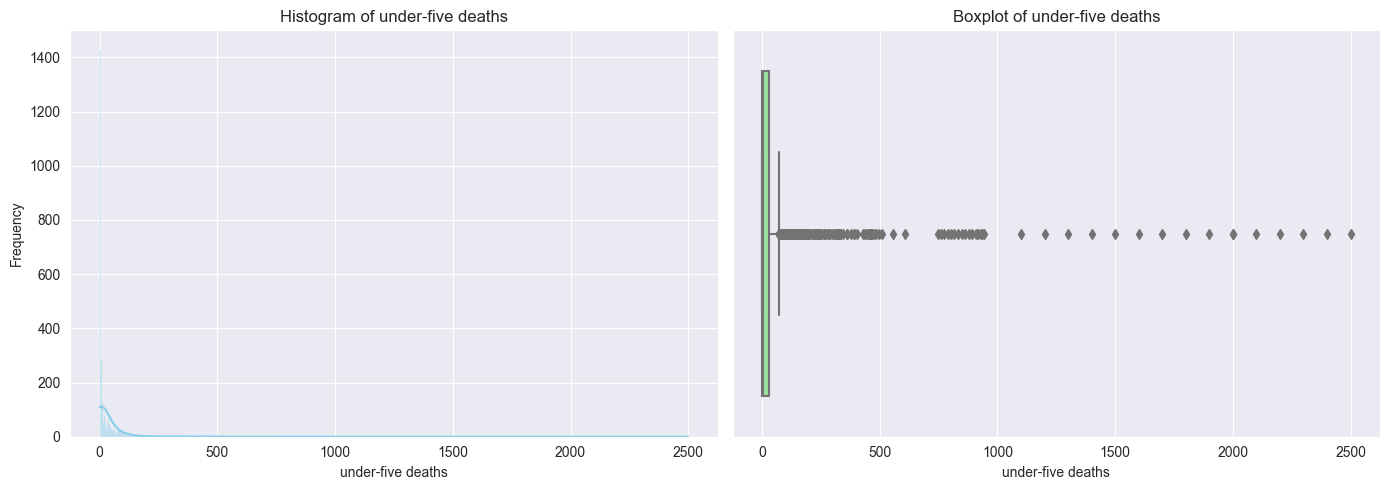

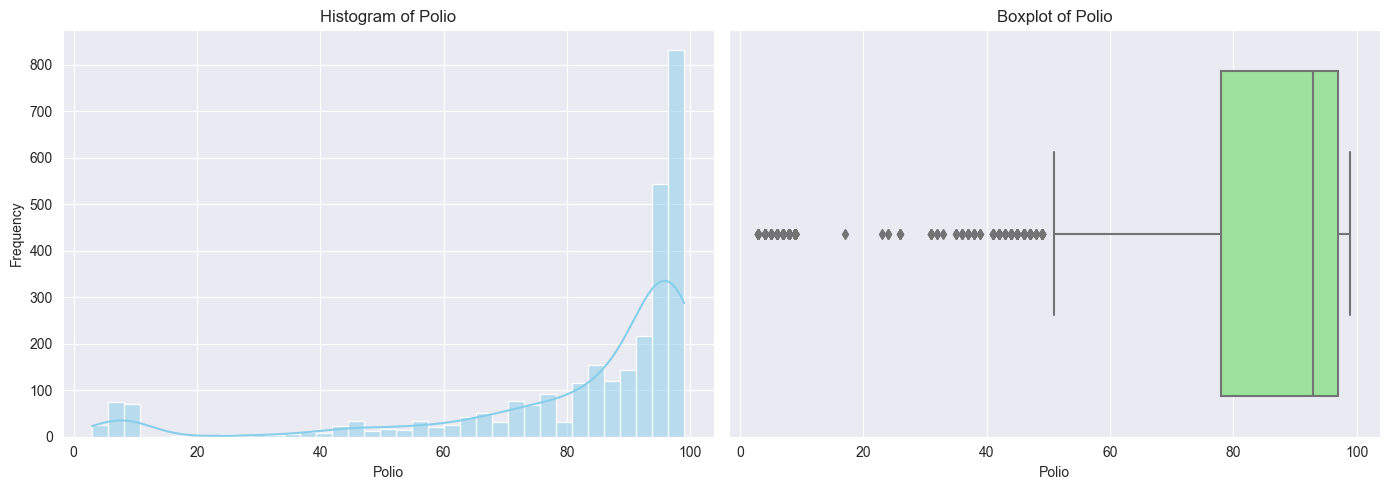

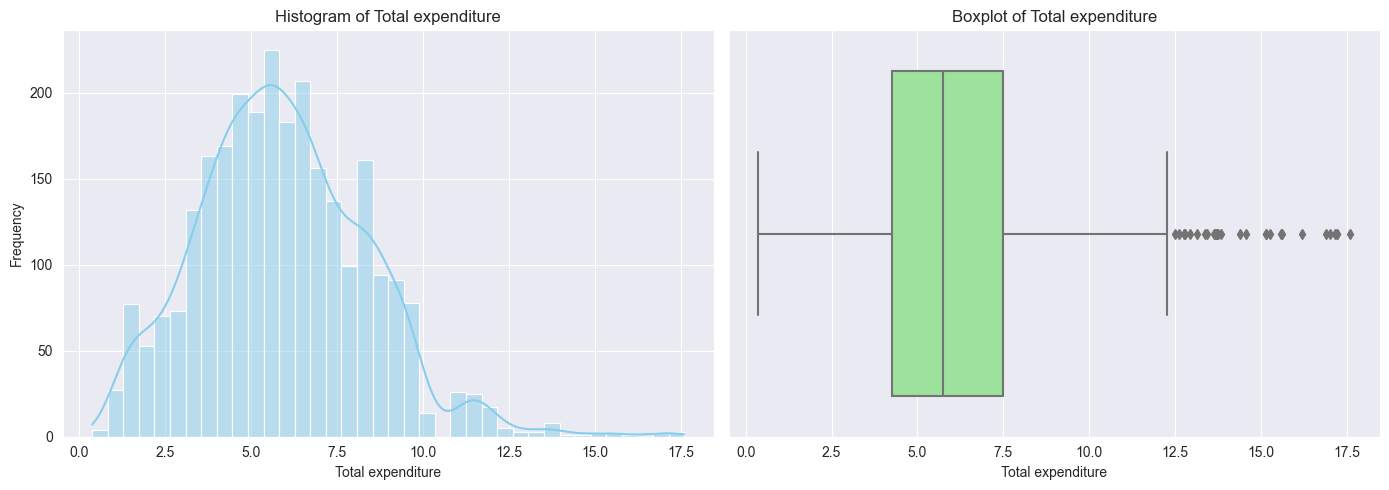

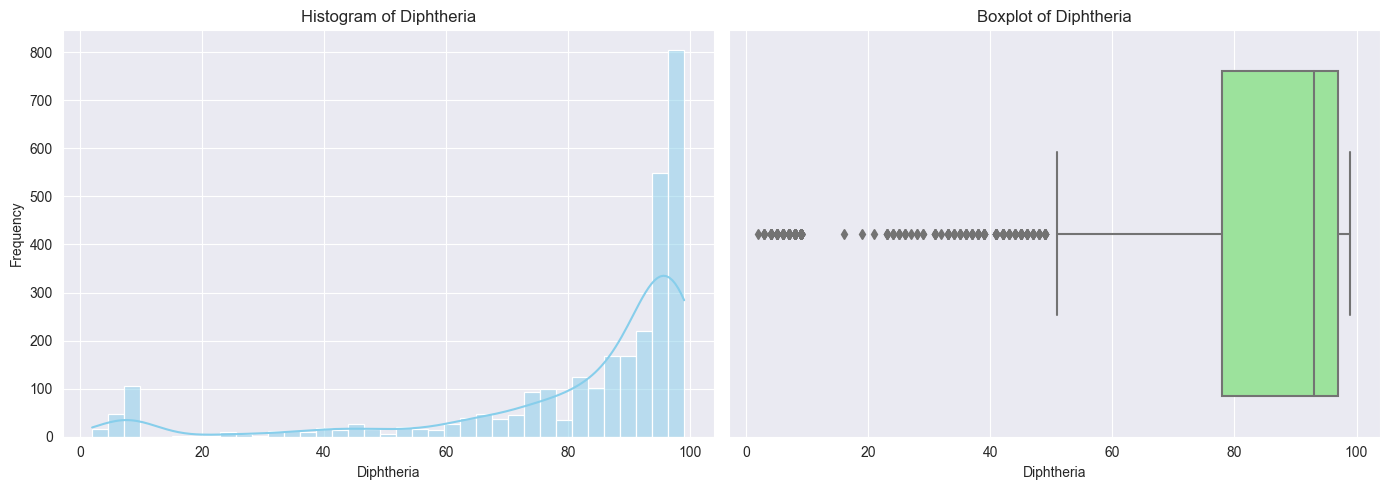

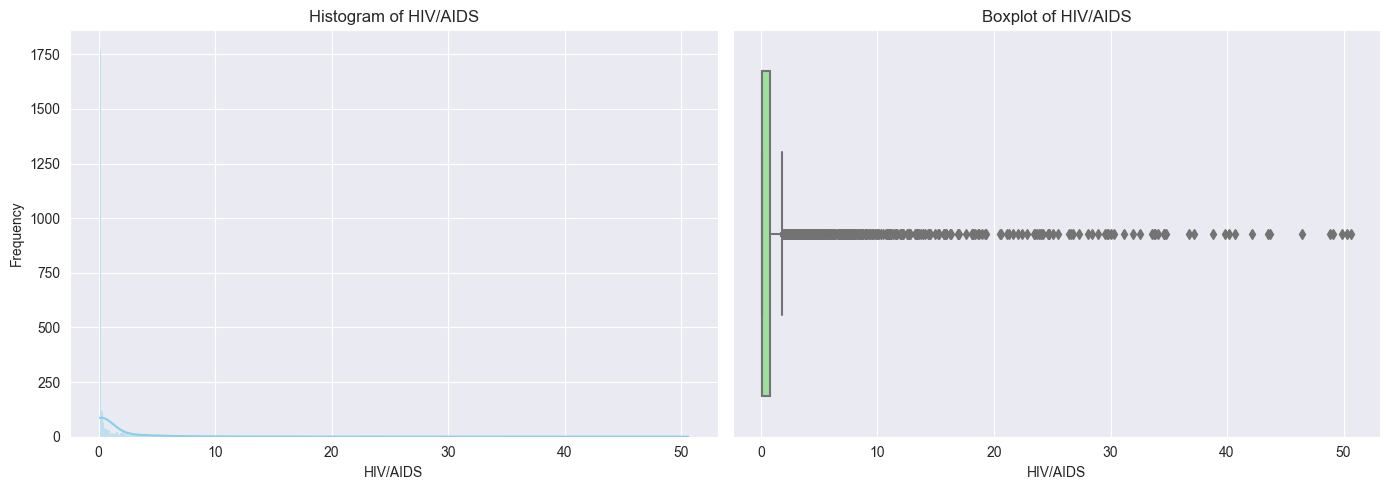

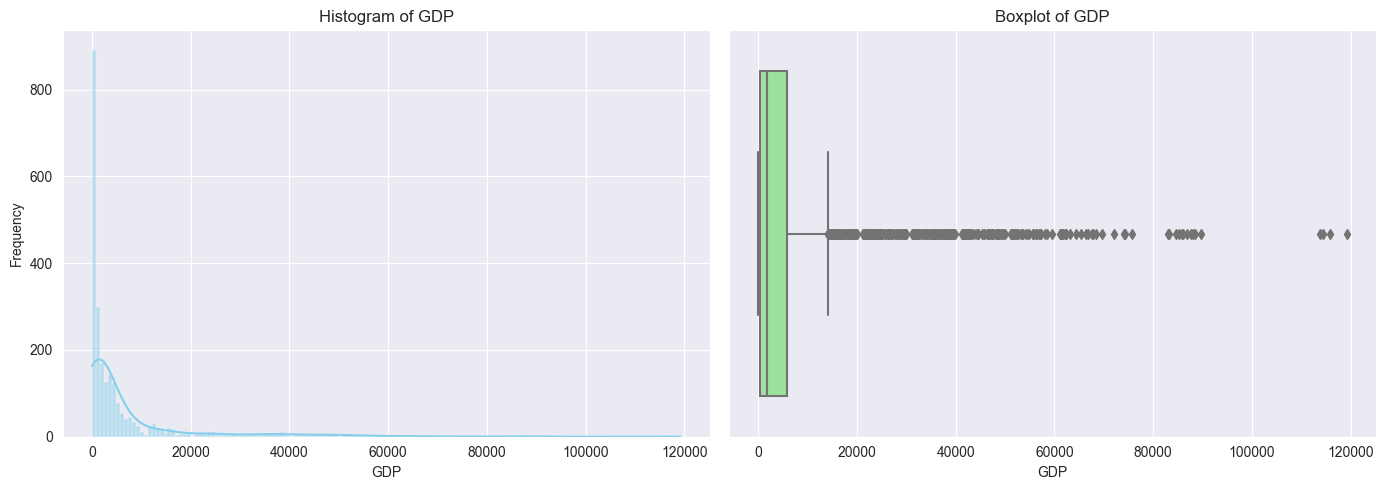

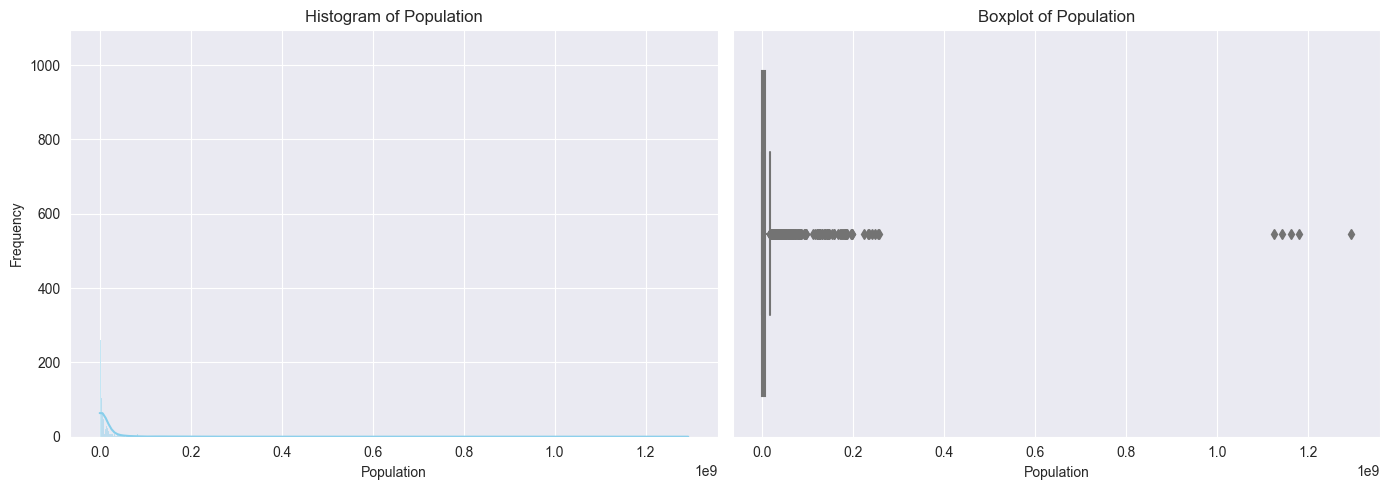

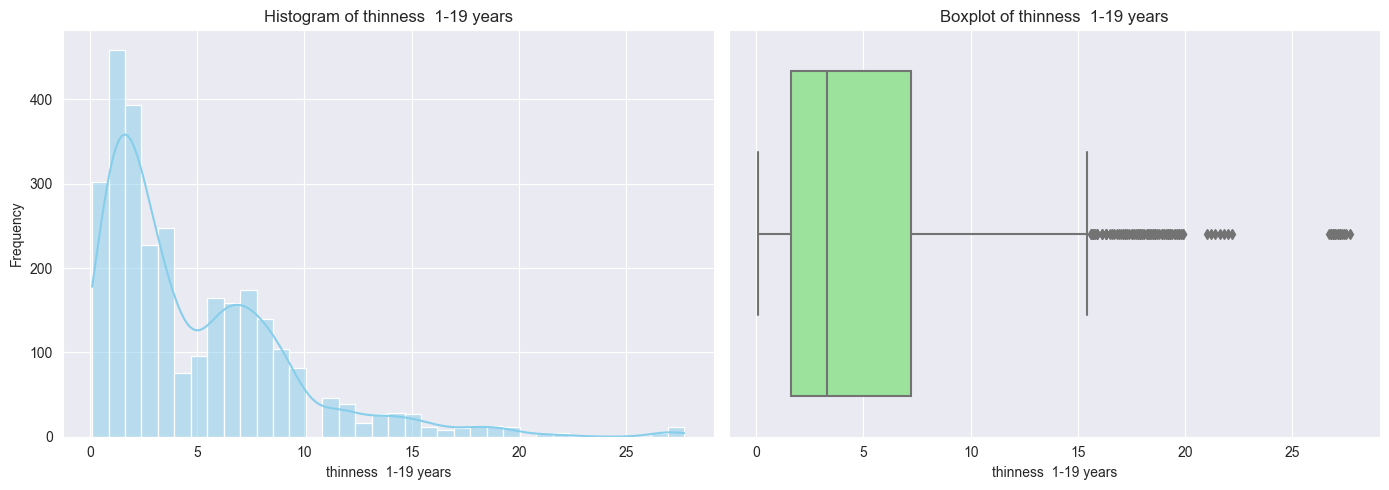

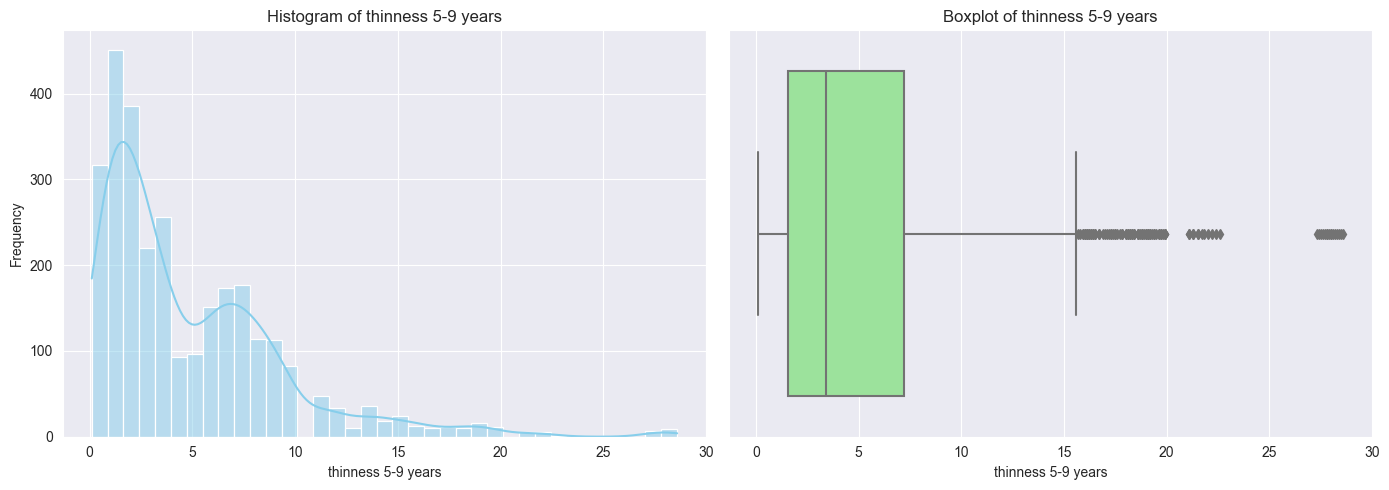

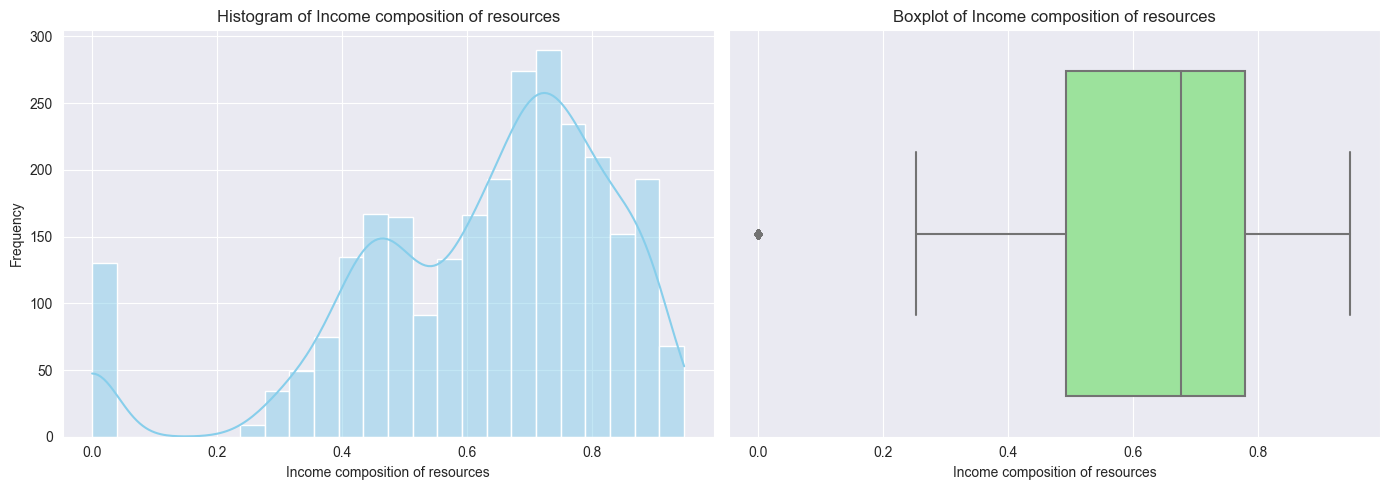

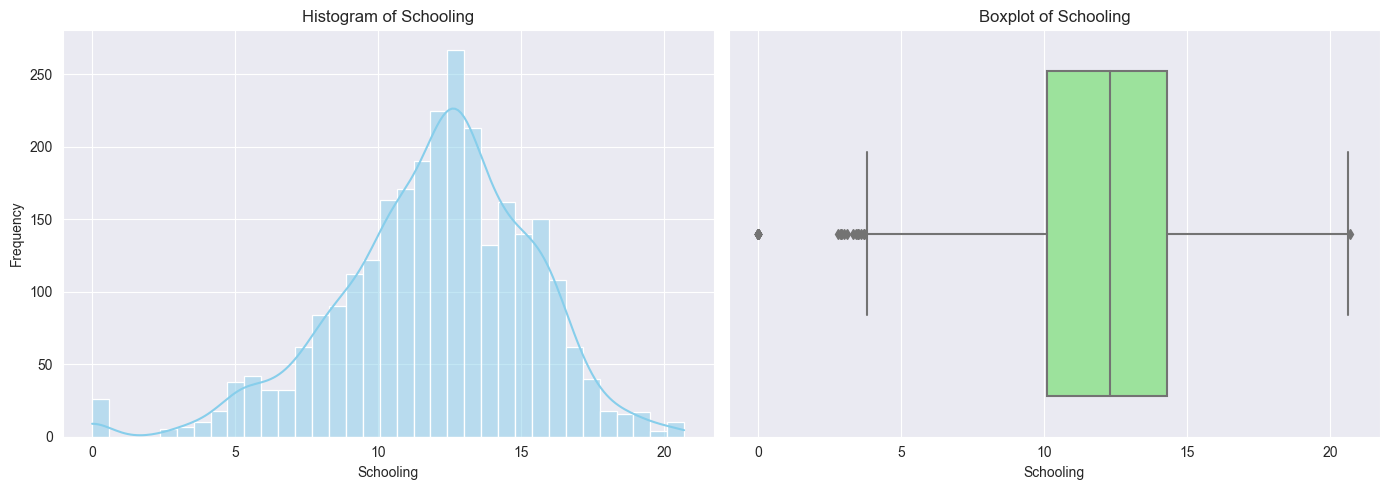

In [19]:
for col in num_cols:
    plot_histogram_and_boxplot(copy_df,col)

In [20]:
def scatter_plot(data,x,y,hue=None):
    plt.figure(figsize=(12,8))
    sns.lmplot(data=data,x=x,y=y,hue=hue)
    plt.title(f"relation between {x} and {y}")

- Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
- Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc

Text(0.5, 1.0, 'correlation between Life expectancy and columns')

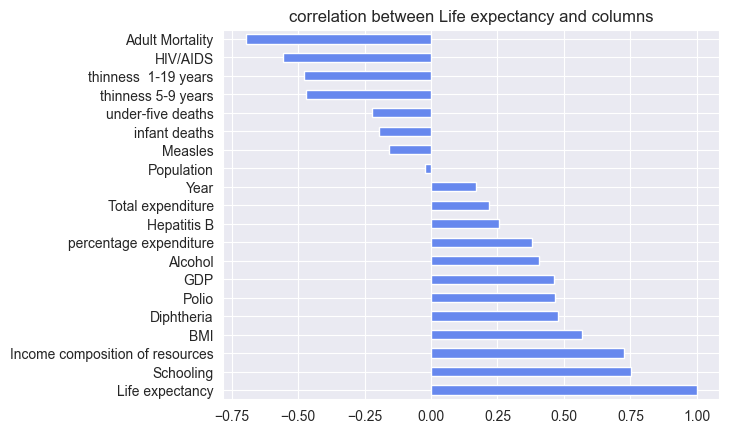

In [21]:
copy_df[num_cols].corr()['Life expectancy'].sort_values(ascending=False).plot(kind='barh')
plt.title('correlation between Life expectancy and columns')

most of features affect the Life expectancy except Population and year features they have low correlation

**Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?**

<Figure size 1200x800 with 0 Axes>

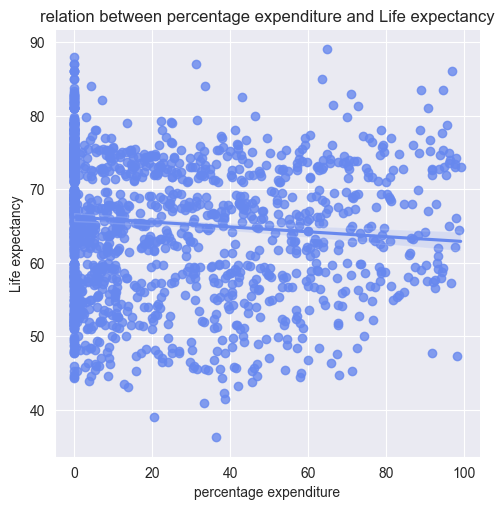

In [22]:
scatter_plot(copy_df[copy_df['percentage expenditure']< 100],'percentage expenditure','Life expectancy')

I think it is not a big factor to increase life expectancy 

**How does Infant and Adult mortality rates affect life expectancy?**

they have -ve corr with it , when they increase they cause life expectancy to decrease

In [23]:
copy_df[num_cols].corr()[['Adult Mortality','infant deaths']].iloc[1]

Adult Mortality   -0.696359
infant deaths     -0.196557
Name: Life expectancy, dtype: float64

- Does Life Expectancy have positive or negative relationship with drinking alcohol?
has positive relationship

In [24]:
round(copy_df[num_cols].corr()['Alcohol'].iloc[1],3)

0.405

- Do densely populated countries tend to have lower life expectancy? NO

<Figure size 1200x800 with 0 Axes>

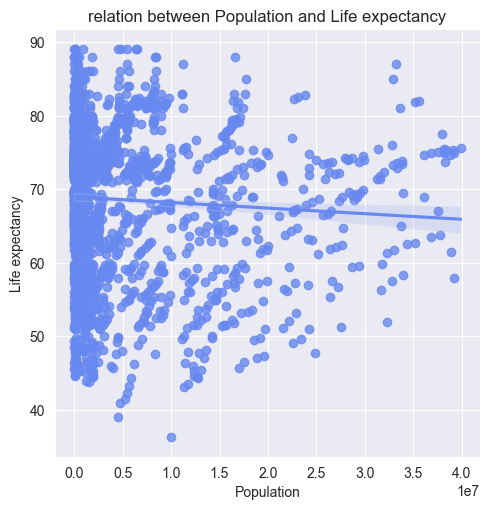

In [25]:
scatter_plot(copy_df[copy_df['Population']<.04e9],'Population','Life expectancy')

- What is the impact of Immunization coverage on life Expectancy?

<Figure size 1200x800 with 0 Axes>

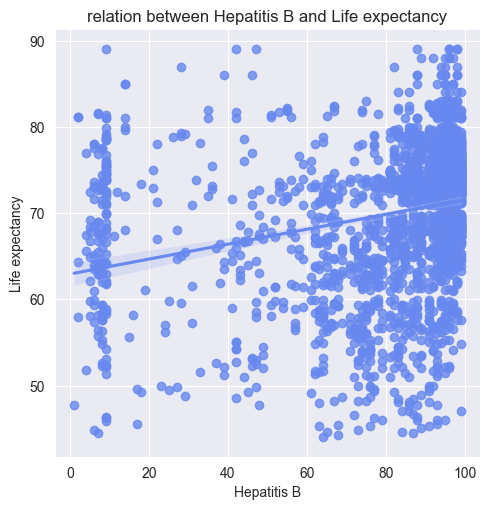

In [26]:
scatter_plot(copy_df,'Hepatitis B','Life expectancy')

<Figure size 1200x800 with 0 Axes>

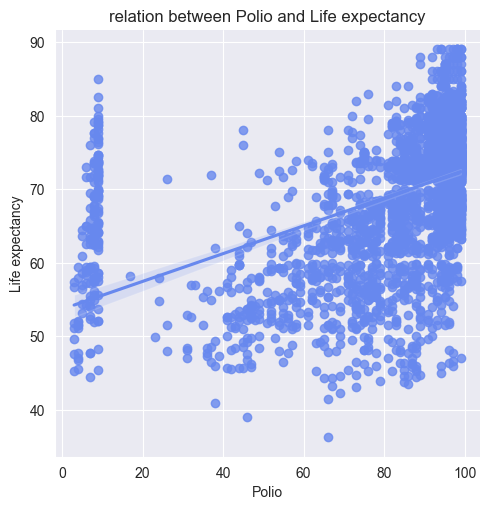

In [27]:
scatter_plot(copy_df,'Polio','Life expectancy')

<Figure size 1200x800 with 0 Axes>

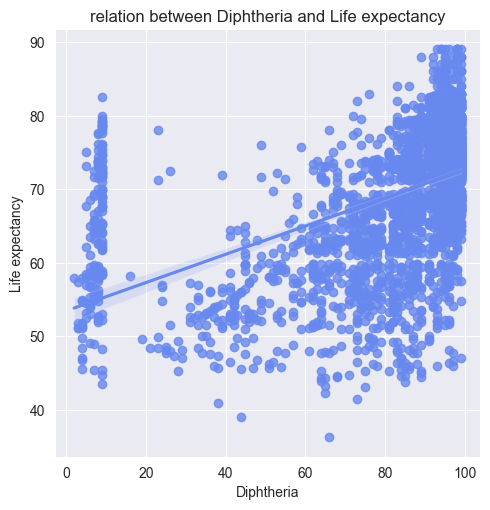

In [28]:
scatter_plot(copy_df,'Diphtheria','Life expectancy')

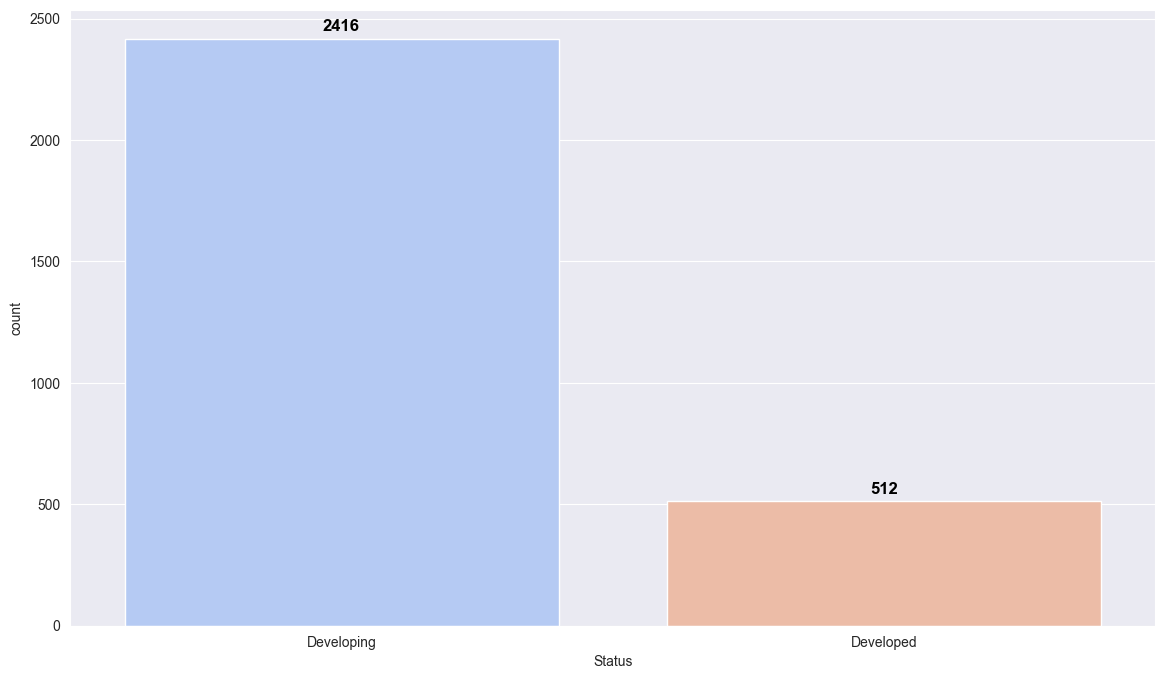

In [29]:
plt.figure(figsize=(14, 8))
ax=sns.countplot(x=copy_df['Status'],palette='coolwarm')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='center', 
            xytext=(0, 9), 
            textcoords='offset points', 
            fontsize=12, color='black', weight='bold')

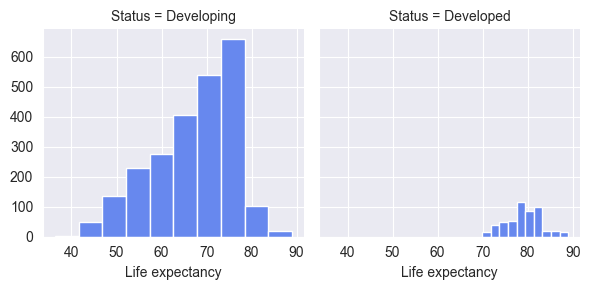

In [30]:
g=sns.FacetGrid(copy_df,col='Status')
g=g.map(plt.hist,'Life expectancy')

we can notice the difference through the effect of status column on Life expectancy

## Data preprocessing

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error,r2_score,make_scorer
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [32]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X)  


In [33]:
cat_pipe=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])
log_pipe=Pipeline(steps=[
    ('log transformer',LogTransformer()),
    ('knn_imputer', KNNImputer(n_neighbors=5)),
    ('scalar',StandardScaler())
])
num_pipe=Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5)),
    ('scalar',StandardScaler())
])

In [34]:
model_df=copy_df.drop(columns='Country')

In [ ]:
#num_cols

In [35]:
cat_cols=model_df.select_dtypes(include='object').columns.to_list()
non_log_cols=['Year','Adult Mortality','infant deaths','Alcohol',
               'Hepatitis B','BMI','Polio','Total expenditure','Diphtheria','thinness  1-19 years',
              'thinness 5-9 years','Income composition of resources','Schooling']
log_cols=['HIV/AIDS','Measles','percentage expenditure','GDP','Population','under-five deaths']

In [36]:
cat_cols

['Status']

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('log_pipeline', log_pipe, log_cols),  
        ('standard_pipeline', num_pipe, non_log_cols) ,
        ('cat_pipeline',cat_pipe,cat_cols)
    ]
)

In [38]:
X=model_df.drop(columns='Life expectancy')
y=model_df['Life expectancy']

In [85]:
X.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [39]:
#y

I am confused to split the data by 2 ways
- using train test split
- train data for old years and test data for recent years so I think to try both

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=model_df['Status'],random_state=42)

In [41]:
X_train.shape

(2196, 20)

In [42]:
X_test.shape

(732, 20)

In [43]:
model1 = ('lr', LinearRegression())
model2 = ('rf', RandomForestRegressor(n_estimators=200,min_samples_leaf=10,
                                      max_depth=2,max_features='sqrt'))
model3 = ('svr', SVR())
model4 = ('lasso',Lasso(alpha=0.1))
model5 = ('ridge',Ridge(alpha=0.1))


voting_regressor = VotingRegressor(estimators=[model1, model2, model3,model4,model5])


In [44]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_regressor', voting_regressor)
])

In [45]:
scoring = {
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': 'r2'
}

In [46]:
model_mae=-cross_val_score(full_pipeline,X_train,y_train,scoring='neg_mean_absolute_error')

In [48]:
pd.Series(model_mae).describe()

count    5.000000
mean     2.448854
std      0.147999
min      2.238005
25%      2.351807
50%      2.529362
75%      2.536038
max      2.589058
dtype: float64

In [55]:
# Perform cross-validation
cv_results = cross_validate(full_pipeline, X, y, cv=5, scoring=scoring, return_train_score=True)

In [58]:
evalute=pd.DataFrame(cv_results)
evalute

,fit_time,score_time,test_mae,train_mae,test_r2,train_r2
0,1.134787,0.236526,-2.713844,-2.356157,0.876598,0.877475
1,1.111770,0.233267,-2.630336,-2.353229,0.856074,0.888464
2,1.123108,0.216211,-2.911011,-2.304710,0.833412,0.890329
3,1.139705,0.240552,-2.469550,-2.374094,0.839441,0.890569
4,1.076265,0.241648,-2.398125,-2.406431,0.893782,0.878747


In [60]:
evalute['test_mae']=evalute['test_mae'].apply(lambda x : x * -1)
evalute['train_mae']=evalute['train_mae'].apply(lambda x : x * -1)

In [64]:
print("Mean Test MAE:",evalute['test_mae'].mean())
print("Mean Test R2:", evalute['test_r2'].mean())

Mean Test MAE: 2.624573037292676
Mean Test R2: 0.8598614205436685


In [63]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log_pipeline',
                                                  Pipeline(steps=[('log '
                                                                   'transformer',
                                                                   LogTransformer()),
                                                                  ('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['HIV/AIDS', 'Measles',
                                                   'percentage expenditure',
                                                   'GDP', 'Population',
                                                   'under-five deaths']),
                                                 ('standard_pipeline',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('sca...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Status'])])),
                ('voting_regressor',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('rf',
                                              RandomForestRegressor(max_depth=2,
                                                                    max_features='sqrt',
                                                                    min_samples_leaf=10,
                                                                    n_estimators=200)),
                                             ('svr', SVR()),
                                             ('lasso', Lasso(alpha=0.1)),
                                             ('ridge', Ridge(alpha=0.1))]))])

In [65]:
predictions=full_pipeline.predict(X_test)

In [66]:
print(mean_absolute_error(y_test,predictions))

2.5141623412106844


In [67]:
print(r2_score(y_test,predictions))

0.8721350197188479


In [75]:
param_grid = {
    'voting_regressor__rf__n_estimators': [100, 200],
    'voting_regressor__rf__max_depth': [5,10],
    'voting_regressor__rf__min_samples_leaf':[10,15],
    'voting_regressor__svr__C': [0.1, 1, 10],
    'voting_regressor__svr__kernel': ['linear', 'rbf'],
    'voting_regressor__lasso__alpha':[.01,.1]
}

In [76]:
model1 = ('lr', LinearRegression())
model2 = ('rf', RandomForestRegressor())
model3 = ('svr', SVR())
model4 = ('lasso',Lasso())
model5 = ('ridge',Ridge(alpha=0.1))


voting_regressor2 = VotingRegressor(estimators=[model1, model2, model3,model4,model5])


In [77]:
full_pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_regressor', voting_regressor2)
])

In [78]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=full_pipeline2, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)


In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('log_pipeline',
                                                                         Pipeline(steps=[('log '
                                                                                          'transformer',
                                                                                          LogTransformer()),
                                                                                         ('knn_imputer',
                                                                                          KNNImputer()),
                                                                                         ('scalar',
                                                                                          StandardScaler())]),
                                                                         ['HIV/AIDS',
                                                                          'Measles',
                                                                          'percentage '
                                                                          'expenditure',
                                                                          'GDP',
                                                                          'Population',
                                                                          'under-five '
                                                                          'deaths']),
                                                                        ('standard_pipeline',
                                                                         Pipeline(steps=[('...
                                                                    ('ridge',
                                                                     Ridge(alpha=0.1))]))]),
             n_jobs=-1,
             param_grid={'voting_regressor__lasso__alpha': [0.01, 0.1],
                         'voting_regressor__rf__max_depth': [5, 10],
                         'voting_regressor__rf__min_samples_leaf': [10, 15],
                         'voting_regressor__rf__n_estimators': [100, 200],
                         'voting_regressor__svr__C': [0.1, 1, 10],
                         'voting_regressor__svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [80]:
print("Best parameters found: ", grid_search.best_params_)

print("Best MAE score: ", -grid_search.best_score_)


Best parameters found:  {'voting_regressor__lasso__alpha': 0.1, 'voting_regressor__rf__max_depth': 10, 'voting_regressor__rf__min_samples_leaf': 10, 'voting_regressor__rf__n_estimators': 100, 'voting_regressor__svr__C': 10, 'voting_regressor__svr__kernel': 'rbf'}
Best MAE score:  2.0286099498265555


In [81]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [84]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log_pipeline',
                                                  Pipeline(steps=[('log '
                                                                   'transformer',
                                                                   LogTransformer()),
                                                                  ('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['HIV/AIDS', 'Measles',
                                                   'percentage expenditure',
                                                   'GDP', 'Population',
                                                   'under-five deaths']),
                                                 ('standard_pipeline',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('sca...
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Status'])])),
                ('voting_regressor',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('rf',
                                              RandomForestRegressor(max_depth=10,
                                                                    min_samples_leaf=10)),
                                             ('svr', SVR(C=10)),
                                             ('lasso', Lasso(alpha=0.1)),
                                             ('ridge', Ridge(alpha=0.1))]))])

In [82]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MAE: ", mae)
print("Test R2: ", r2)

Test MAE:  2.0684197526513755
Test R2:  0.9101337621891042


In [83]:
import joblib
joblib_file = "voting_regressor_model.pkl"  
joblib.dump(best_model, joblib_file)

['voting_regressor_model.pkl']